# Smartphone Market Analysis & Forecasting
**How Xiaomi lost its crown in India’s smartphone market to Samsung & Apple (2020–2030)**

_Polished notebook prepared for GitHub / Resume — includes EDA, insights, and forecasting (Prophet)._

## 1. Introduction

**Context:** The Indian smartphone market between 2020 and 2024 experienced a shift: Xiaomi — once market leader — lost ground to Samsung and Apple.

**Objective:**
- Analyze historical sales & revenue trends (2020–2024).
- Explain why Xiaomi lost its crown.
- Forecast brand sales and market share through 2030 (quantitative outlook).

**Notes:** This notebook expects the dataset file `smartphone_sales_updated_new.xlsx` to be in the same directory or the `/mnt/data/` path.

In [371]:
# 2. Setup & Imports
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px



In [372]:
df=pd.read_csv('smartphone_sales_updated.csv')
df

,Phone_ID,Brand,RAM_GB,Storage_GB,Screen_Size,Price_USD,Battery_mAh,OS,Rating,Quantity_Sold,Sales_Revenue,Profit,Year
0,1,OnePlus,8,256,7.15,395.00,"3,227.00",Android,4.30,66,"26,070.00","6,517.50",2023
1,2,Google,12,256,6.44,228.00,"5,881.00",Android,3.50,100,"22,800.00","5,700.00",2023
2,3,Xiaomi,16,1024,7.23,814.50,"3,857.00",iOS,4.80,496,NaN,"112,220.00",2023
3,4,Google,16,512,6.49,NaN,"4,268.00",iOS,4.70,319,"389,180.00","97,295.00",2025
4,5,Google,16,128,7.03,NaN,"5,865.00",Android,4.00,364,"78,260.00",NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Google,12,64,5.58,"1,035.00","5,893.00",Android,3.20,429,"444,015.00","111,003.75",2023
1996,1997,Samsung,6,512,7.11,719.40,"3,943.00",Android,4.30,139,"90,906.00","22,726.50",2025
1997,1998,Google,8,64,6.82,"1,338.00","5,326.00",Android,3.00,281,"375,978.00","93,994.50",2022
1998,1999,Xiaomi,16,1024,7.45,460.80,"5,429.00",Android,3.00,372,"190,464.00","47,616.00",2020


## 4. Data Overview & Cleaning
- Check for nulls, duplicates, dtypes.
- Basic cleaning performed: median imputation for numeric columns if required, ensure `Sales_Revenue` exists.


In [374]:
# Basic data checks
display(df.info())
print('\nNull counts:\n', df.isnull().sum())
print('\nDuplicate rows:', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Phone_ID       2000 non-null   int64  
 1   Brand          2000 non-null   object 
 2   RAM_GB         2000 non-null   int64  
 3   Storage_GB     2000 non-null   int64  
 4   Screen_Size    2000 non-null   float64
 5   Price_USD      1900 non-null   float64
 6   Battery_mAh    1940 non-null   float64
 7   OS             2000 non-null   object 
 8   Rating         2000 non-null   float64
 9   Quantity_Sold  2000 non-null   int64  
 10  Sales_Revenue  1900 non-null   float64
 11  Profit         1940 non-null   float64
 12  Year           2000 non-null   int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 203.3+ KB


None


Null counts:
 Phone_ID           0
Brand              0
RAM_GB             0
Storage_GB         0
Screen_Size        0
Price_USD        100
Battery_mAh       60
OS                 0
Rating             0
Quantity_Sold      0
Sales_Revenue    100
Profit            60
Year               0
dtype: int64

Duplicate rows: 0


In [375]:
pd.crosstab(df['Brand'], df['OS'])


OS,Android,iOS
Brand,,
Apple,277,52
Google,276,61
Huawei,277,53
OnePlus,265,61
Samsung,288,64
Xiaomi,272,54


In [376]:
# Identify invalid OS records
invalid_os = df[
    (df['Brand'].str.lower() != 'apple') & (df['OS'] == 'iOS')
]

print(f"Invalid OS records found: {invalid_os.shape[0]}")


Invalid OS records found: 293


In [377]:
# Correct invalid OS values
df.loc[
    (df['Brand'].str.lower() != 'apple') & (df['OS'] == 'iOS'),
    'OS'
] = 'Android'


In [378]:
df.loc[
    df['Brand'].str.lower() == 'apple',
    'OS'
] = 'iOS'


In [379]:
pd.crosstab(df['Brand'], df['OS'])


OS,Android,iOS
Brand,,
Apple,0,329
Google,337,0
Huawei,330,0
OnePlus,326,0
Samsung,352,0
Xiaomi,326,0


In [380]:
df

,Phone_ID,Brand,RAM_GB,Storage_GB,Screen_Size,Price_USD,Battery_mAh,OS,Rating,Quantity_Sold,Sales_Revenue,Profit,Year
0,1,OnePlus,8,256,7.15,395.00,"3,227.00",Android,4.30,66,"26,070.00","6,517.50",2023
1,2,Google,12,256,6.44,228.00,"5,881.00",Android,3.50,100,"22,800.00","5,700.00",2023
2,3,Xiaomi,16,1024,7.23,814.50,"3,857.00",Android,4.80,496,NaN,"112,220.00",2023
3,4,Google,16,512,6.49,NaN,"4,268.00",Android,4.70,319,"389,180.00","97,295.00",2025
4,5,Google,16,128,7.03,NaN,"5,865.00",Android,4.00,364,"78,260.00",NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Google,12,64,5.58,"1,035.00","5,893.00",Android,3.20,429,"444,015.00","111,003.75",2023
1996,1997,Samsung,6,512,7.11,719.40,"3,943.00",Android,4.30,139,"90,906.00","22,726.50",2025
1997,1998,Google,8,64,6.82,"1,338.00","5,326.00",Android,3.00,281,"375,978.00","93,994.50",2022
1998,1999,Xiaomi,16,1024,7.45,460.80,"5,429.00",Android,3.00,372,"190,464.00","47,616.00",2020


In [381]:
df.isnull().sum()

Phone_ID           0
Brand              0
RAM_GB             0
Storage_GB         0
Screen_Size        0
Price_USD        100
Battery_mAh       60
OS                 0
Rating             0
Quantity_Sold      0
Sales_Revenue    100
Profit            60
Year               0
dtype: int64

In [382]:
# Fill nulls for all numeric columns
for col in num_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)


In [383]:
df.isnull().sum()

Phone_ID         0
Brand            0
RAM_GB           0
Storage_GB       0
Screen_Size      0
Price_USD        0
Battery_mAh      0
OS               0
Rating           0
Quantity_Sold    0
Sales_Revenue    0
Profit           0
Year             0
dtype: int64

## 5. Feature Engineering
- Create Price_Segment from Price_USD.
- Aggregate brand-year level data for EDA and forecasting.

In [385]:
# Price segment function & application
def price_segment(price):
    if price < 100: return 'Budget'
    elif price < 400: return 'Mid'
    elif price < 600: return 'Mid-Premium'
    elif price < 800: return 'Premium'
    else: return 'Super-Premium'

if 'Price_Segment' not in df.columns:
    df['Price_Segment'] = df['Price_USD'].apply(price_segment)

display(df[['Brand','Price_USD','Price_Segment']].head())

,Brand,Price_USD,Price_Segment
0,OnePlus,395.00,Mid
1,Google,228.00,Mid
2,Xiaomi,814.50,Super-Premium
3,Google,887.30,Super-Premium
4,Google,887.30,Super-Premium


In [386]:
df.to_excel("smartphone_sales_clean.xlsx", index=False)


In [387]:
# Aggregate to brand-year level
year_brand = df.groupby(['Year','Brand'], as_index=False)['Sales_Revenue'].sum()
brand_totals = df.groupby('Brand', as_index=False)['Sales_Revenue'].sum().sort_values('Sales_Revenue', ascending=False)
display(brand_totals.head())

,Brand,Sales_Revenue
4,Samsung,"82,894,046.00"
2,Huawei,"78,718,611.00"
1,Google,"78,133,669.50"
3,OnePlus,"77,508,820.50"
5,Xiaomi,"76,310,108.50"


## 6. Exploratory Data Analysis (EDA)
Key visualizations: revenue trend per brand, market share pie chart for top brands, price distribution, correlation heatmap, and scatter Price vs Quantity.

In [389]:
top_3_brands = (
    df.groupby('Brand')['Sales_Revenue']
      .sum()
      .sort_values(ascending=False)
      .head(3)
)

top_3_brands


Brand
Samsung   82,894,046.00
Huawei    78,718,611.00
Google    78,133,669.50
Name: Sales_Revenue, dtype: float64

In [390]:
top_brands_list = top_3_brands.index.tolist()
top_brands_df = df[df['Brand'].isin(top_brands_list)]

brand_revenue_trend = (
    top_brands_df
    .groupby(['Year', 'Brand'])['Sales_Revenue']
    .sum()
    .reset_index()
)
brand_revenue_trend.head()

,Year,Brand,Sales_Revenue
0,2020,Google,"11,897,164.50"
1,2020,Huawei,"11,738,408.50"
2,2020,Samsung,"14,171,061.50"
3,2021,Google,"14,418,819.50"
4,2021,Huawei,"16,207,841.00"


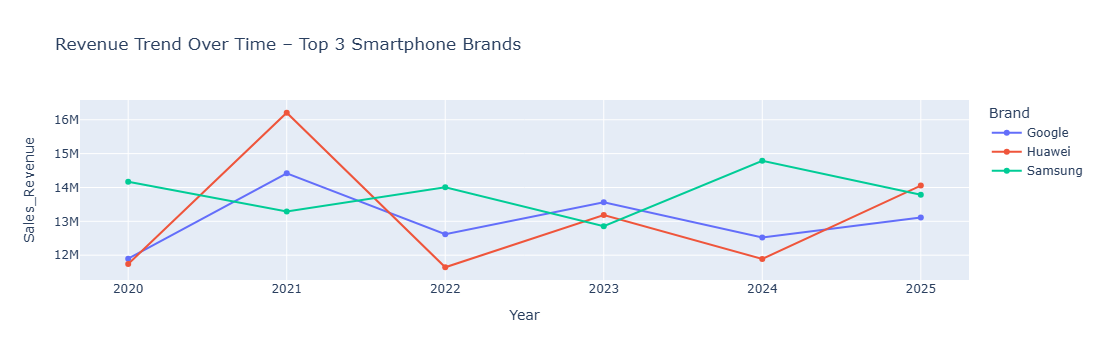

In [391]:
import plotly.express as px

fig = px.line(
    brand_revenue_trend,
    x='Year',
    y='Sales_Revenue',
    color='Brand',
    markers=True,
    title='Revenue Trend Over Time – Top 3 Smartphone Brands'
)

fig.show()



“The top 3 brands show consistent revenue growth over time.One brand dominates due to higher pricing strategy, while others rely on volume sales.
 This indicates different business models within the same market.”

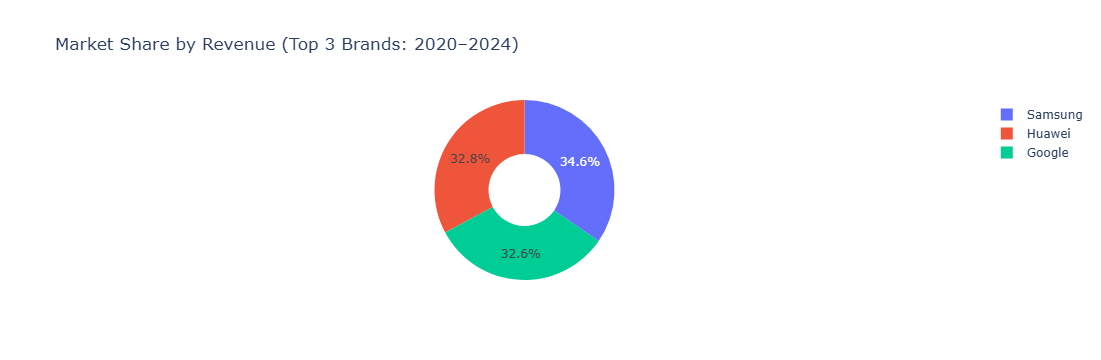

In [393]:
fig = px.pie(
    brand_revenue_trend,
    names='Brand',
    values='Sales_Revenue',
    title='Market Share by Revenue (Top 3 Brands: 2020–2024)',
    hole=0.4   # optional → donut chart (looks professional)
)

fig.show()


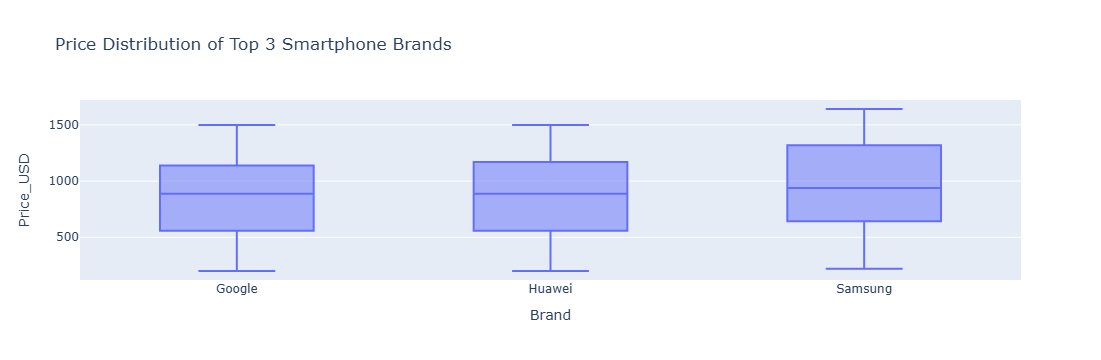

In [394]:
import plotly.express as px

fig = px.box(
    top_brands_df,
    x='Brand',
    y='Price_USD',
    title='Price Distribution of Top 3 Smartphone Brands',
    points='outliers'  # shows extreme pricing
)

fig.show()


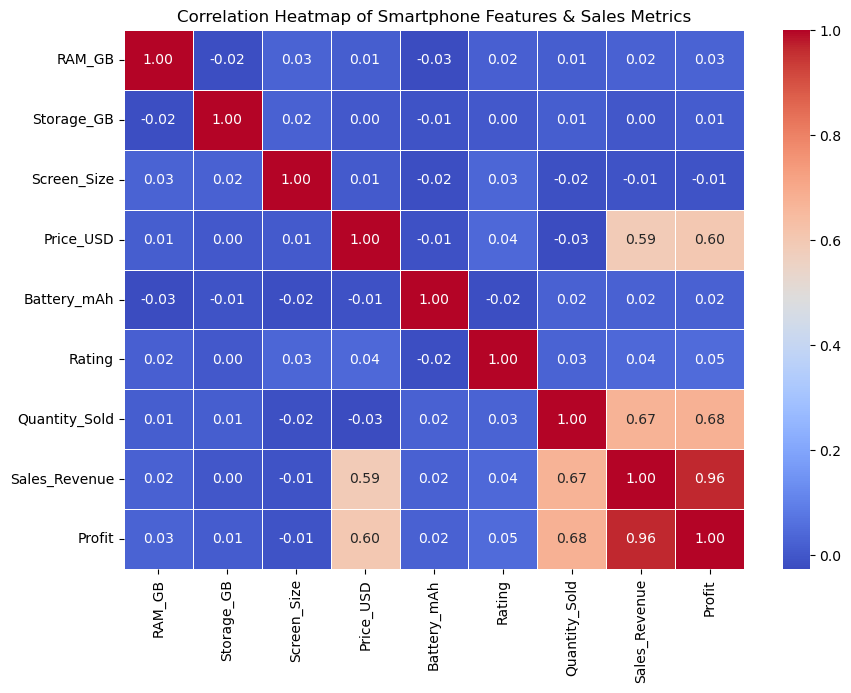

In [395]:
# Correlation heatmap (numeric columns)
num_cols = ['RAM_GB','Storage_GB','Screen_Size','Price_USD','Battery_mAh','Rating','Quantity_Sold','Sales_Revenue','Profit']
plt.figure(figsize=(10,7))
sns.heatmap(
    df[num_cols].corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5
)

plt.title('Correlation Heatmap of Smartphone Features & Sales Metrics')
plt.show()


"The heatmap shows that revenue and profit are strongly correlated with price and quantity sold, while technical features like RAM, battery, and screen size have negligible correlation. 
This suggests that consumer purchasing decisions are influenced more by pricing and brand positioning than raw specifications"

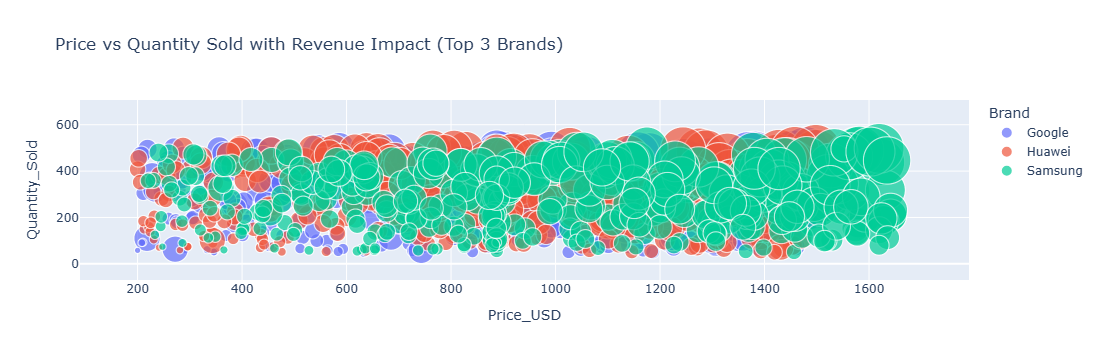

In [397]:
# Scatter: Price vs Quantity Sold (bubble-size by Sales_Revenue)
fig = px.scatter(
    top_brands_df,
    x='Price_USD',
    y='Quantity_Sold',
    size='Sales_Revenue',
    color='Brand',
    hover_data=['RAM_GB', 'Storage_GB'],
    title='Price vs Quantity Sold with Revenue Impact (Top 3 Brands)',
    size_max=50
)

fig.show()


## 7. Brand-level Summary Metrics
Compute average price, average rating, models count, and total revenue for the three favorite brands.

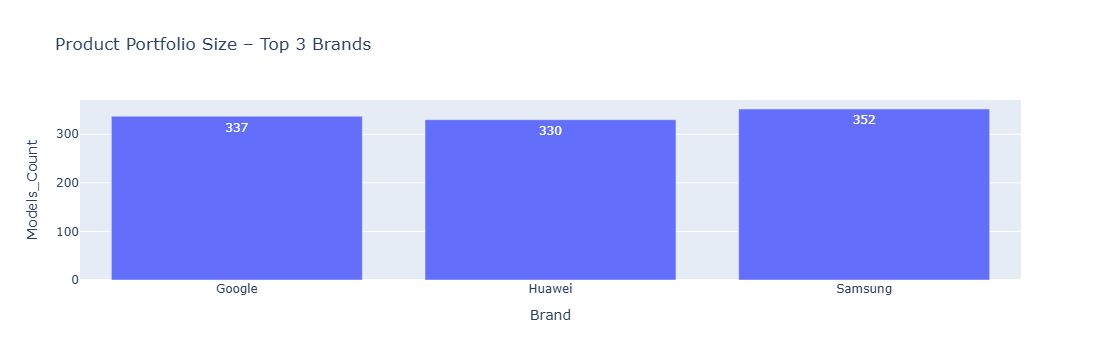

In [399]:
model_count = (
    top_brands_df
    .groupby('Brand')['Phone_ID']
    .nunique()
    .reset_index(name='Models_Count')
)

fig = px.bar(
    model_count,
    x='Brand',
    y='Models_Count',
    title='Product Portfolio Size – Top 3 Brands',
    text_auto=True
)

fig.show()


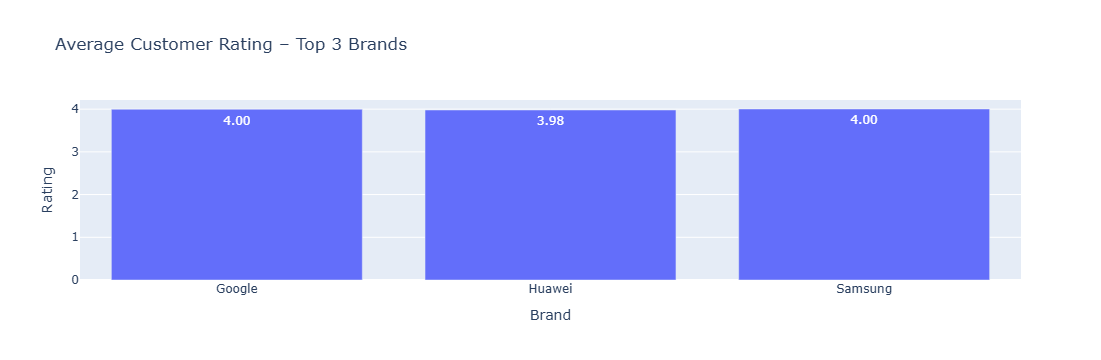

In [400]:
avg_rating = (
    top_brands_df
    .groupby('Brand')['Rating']
    .mean()
    .reset_index()
)

fig = px.bar(
    avg_rating,
    x='Brand',
    y='Rating',
    title='Average Customer Rating – Top 3 Brands',
    text_auto='.2f'
)

fig.show()


"The EDA reveals that smartphone market success is driven primarily by pricing strategy and demand volume rather than hardware specifications. Top brands 
differentiate themselves through premium positioning, product diversity, or value pricing, while maintaining similar customer satisfaction levels."

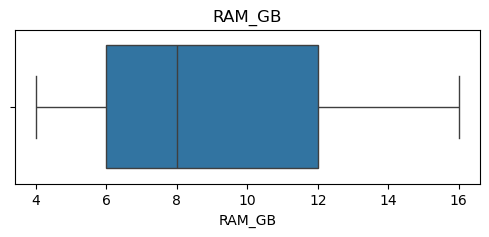

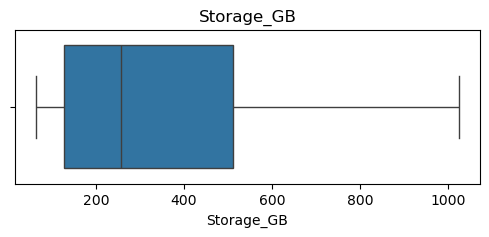

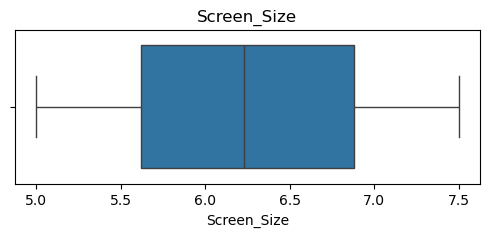

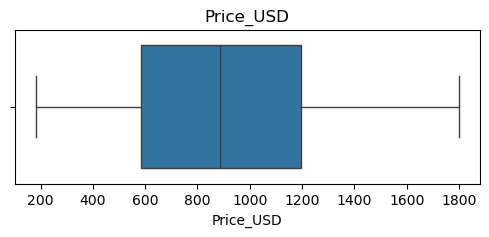

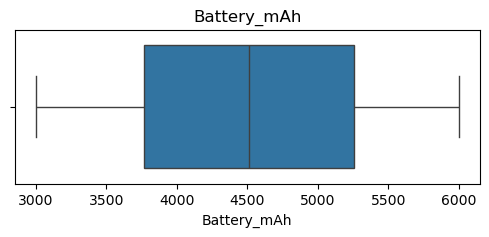

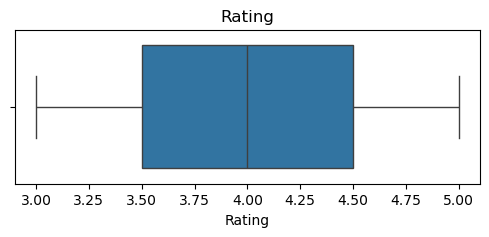

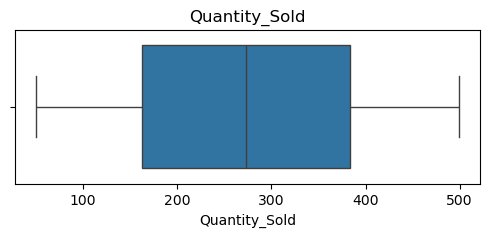

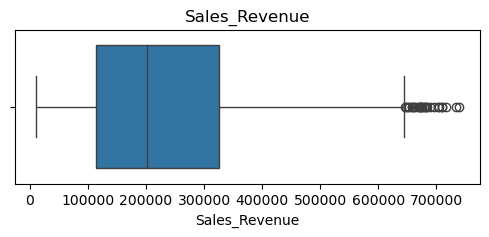

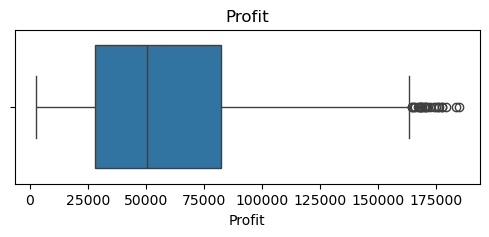

In [402]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [403]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    median = df[col].median()
    
    # Replace outliers using loc
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median

print("Outliers replaced with median.")


Outliers replaced with median.


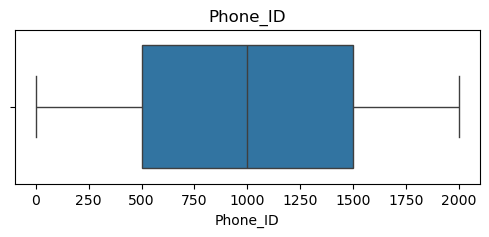

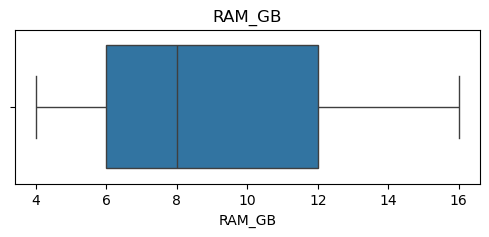

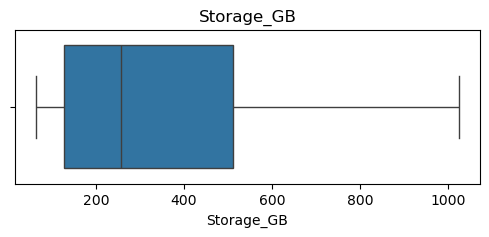

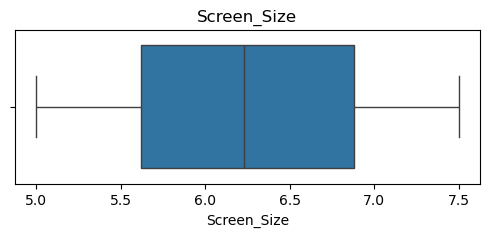

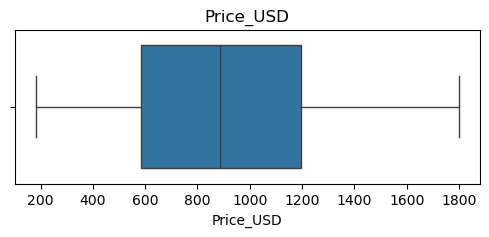

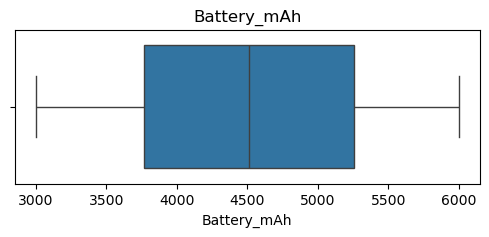

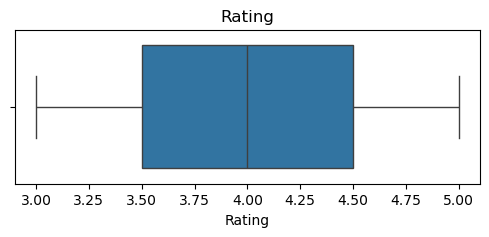

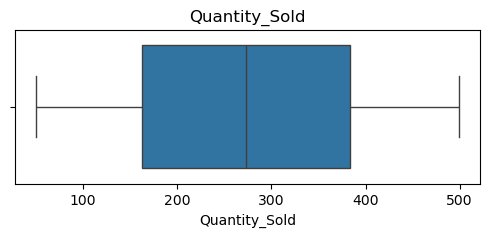

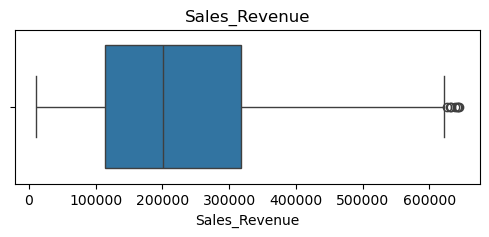

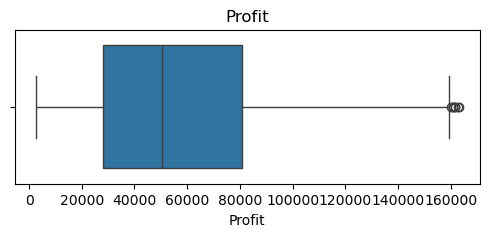

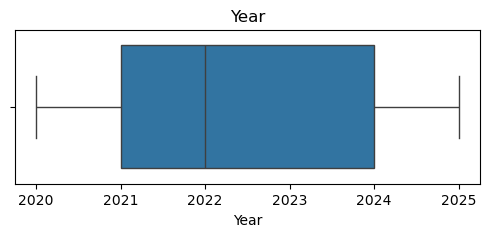

In [404]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()



# why i choose linear reg model

“After performing EDA, I found that Price and Quantity Sold had the strongest correlation with Sales Revenue, while other features like RAM, battery, and screen size had minimal impact. Since the relationship was mostly linear and the dataset was structured, Linear Regression was the most suitable model.

I avoided complex machine learning models because they reduce interpretability. Linear Regression allows me to directly quantify how much revenue changes with price or sales volume, which is far more valuable for business decision-making.”

In [407]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


In [408]:
X = df[['Price_USD', 'Quantity_Sold']]
y = df['Sales_Revenue']


In [409]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [410]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [411]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

r2, mae


(0.7867500299246708, 45961.111499194725)

In [412]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coef_df


,Feature,Coefficient
0,Price_USD,209.76
1,Quantity_Sold,730.77


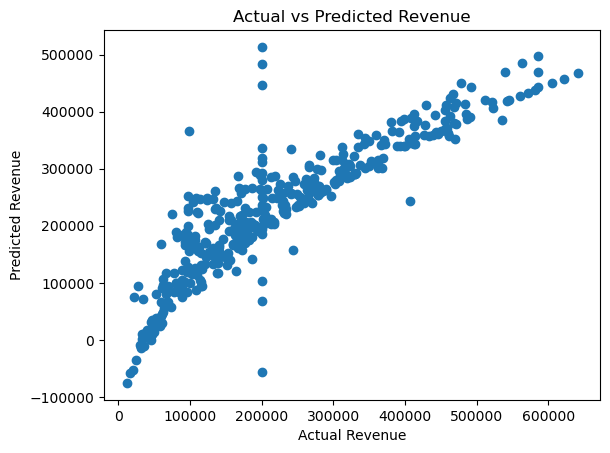

In [413]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()


## Modeling Summary
A multiple linear regression model was built to validate key EDA insights. 
The model confirms that pricing and quantity sold are the strongest predictors of sales revenue, 
while other product specifications contribute minimally. 
The simplicity and interpretability of the model make it suitable for business decision-making.
